In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
icu_data = pd.read_csv('training_v2.csv')
icu_data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [3]:
icu_data['age'].corr(icu_data['hospital_death'])

0.1110167381560926

In [4]:
icu_data.corr()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.000000,-0.009575,-0.004532,-0.005243,-0.003990,-0.001068,0.002036,-0.005400,-0.000992,-0.000570,...,-0.000513,0.000344,0.001907,0.007601,0.003402,-0.000972,-0.001707,-0.002172,-0.001176,-0.004646
patient_id,-0.009575,1.000000,-0.007075,0.004877,0.006343,-0.001380,0.001387,0.002902,-0.001770,-0.004412,...,0.003735,0.001625,-0.002426,0.001307,0.000434,-0.001667,0.000548,0.000844,0.002333,-0.003065
hospital_id,-0.004532,-0.007075,1.000000,-0.001255,-0.008673,0.012874,0.052123,0.027895,0.004526,-0.001285,...,-0.006993,-0.000283,-0.004947,0.002962,0.011978,0.001362,0.000146,-0.002992,0.002588,-0.004730
hospital_death,-0.005243,0.004877,-0.001255,1.000000,0.111017,-0.031247,-0.093574,-0.019526,0.000994,0.063316,...,0.311043,0.283913,0.004403,0.039453,-0.015784,0.038864,0.043973,0.029788,0.018722,0.051105
age,-0.003990,0.006343,-0.008673,0.111017,1.000000,-0.087077,0.067320,-0.109937,-0.024257,0.049872,...,0.143167,0.076275,-0.029477,-0.028065,0.077908,-0.020061,0.025007,0.030310,0.023335,0.025924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatic_failure,-0.000972,-0.001667,0.001362,0.038864,-0.020061,-0.001855,-0.034700,0.010481,-0.011746,0.015063,...,0.024115,0.026941,0.003273,0.525905,0.010647,1.000000,0.003084,-0.001567,0.001689,0.007240
immunosuppression,-0.001707,0.000548,0.000146,0.043973,0.025007,-0.031144,-0.014695,0.000530,-0.031111,0.032695,...,0.038922,0.026268,0.025781,-0.002971,-0.002502,0.003084,1.000000,0.134934,0.103201,0.269653
leukemia,-0.002172,0.000844,-0.002992,0.029788,0.030310,-0.013375,-0.017587,0.001718,0.001014,0.041853,...,0.044126,0.031966,-0.002471,-0.005373,0.002890,-0.001567,0.134934,1.000000,0.031380,0.006210
lymphoma,-0.001176,0.002333,0.002588,0.018722,0.023335,-0.010017,-0.008215,0.008370,-0.002336,0.013954,...,0.018303,0.011287,0.021529,0.001516,-0.002326,0.001689,0.103201,0.031380,1.000000,0.014749


In [5]:
#remove height weight because that is repetitve info (contained in bmi)
FeatureToBeRemoved = ['encounter_id','patient_id','hospital_id','icu_id','hospital_death','ethnicity','height','weight']

In [6]:
np.unique(icu_data.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [7]:
icu_data.select_dtypes(include=['object']).columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [8]:
icu_data.select_dtypes(include=['float']).columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'bilirubin_apache',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=170)

In [9]:
icu_data.select_dtypes(include=['int64']).columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death',
       'elective_surgery', 'icu_id', 'readmission_status',
       'apache_post_operative'],
      dtype='object')

In [10]:
if icu_data['encounter_id'].dtype == 'int64':
    print("yes")

yes


In [11]:
icu_data['weight'].max()

186.0

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
i=0
for col in icu_data.columns:  
    if icu_data[col].dtype == 'float' :
        
        if i< 50:

                df1      = icu_data.loc[icu_data['hospital_death']==0]
                df2      = icu_data.loc[icu_data['hospital_death']==1]

                fig = plt.figure(figsize=(20,4))
                sns.distplot(df1[col].dropna(),  color='red', label='hospital_death 0', kde=True); 
                sns.distplot(df2[col].dropna(),  color='blue', label='hospital_death 1', kde=True); 

                plt.xlabel(col, fontsize=12)
                fig=plt.legend(loc='best')
                plt.show()
                i=i+1

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

<Figure size 2000x400 with 1 Axes>

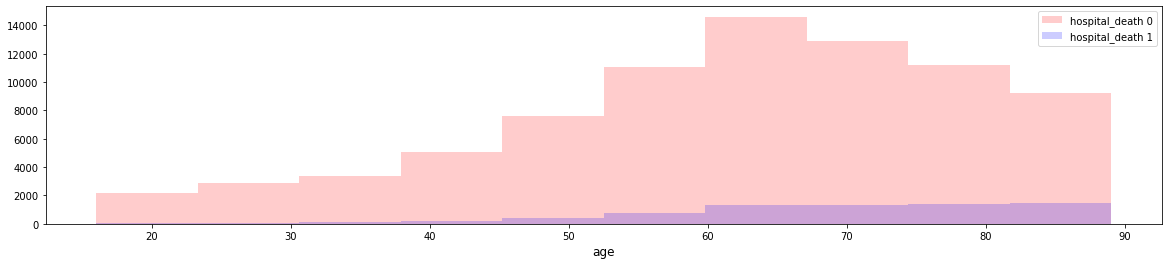

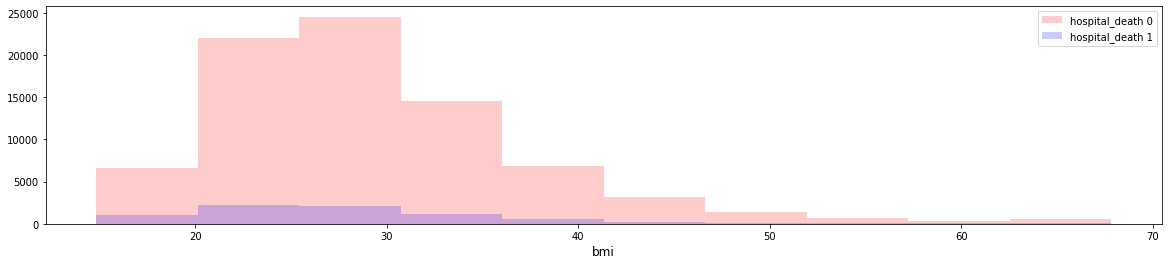

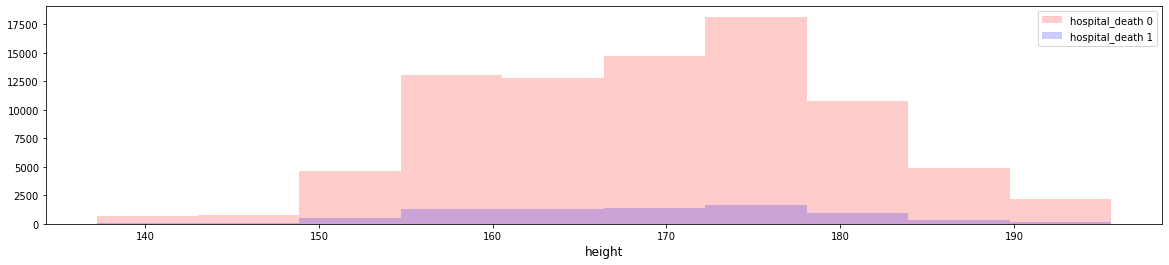

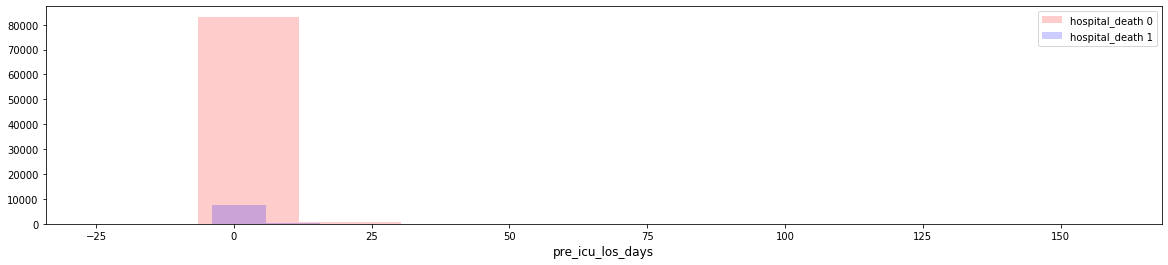

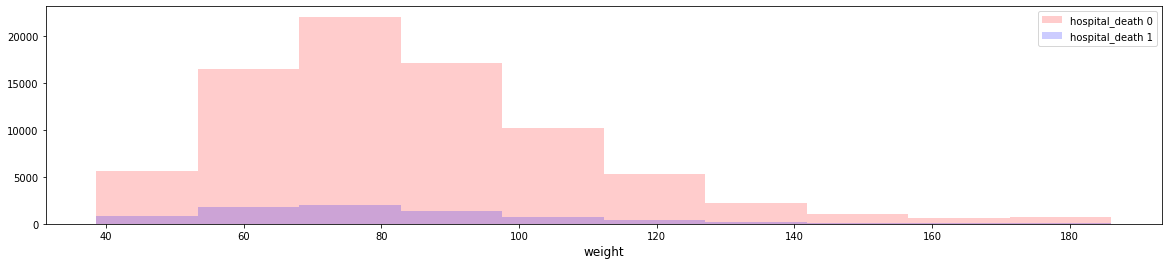

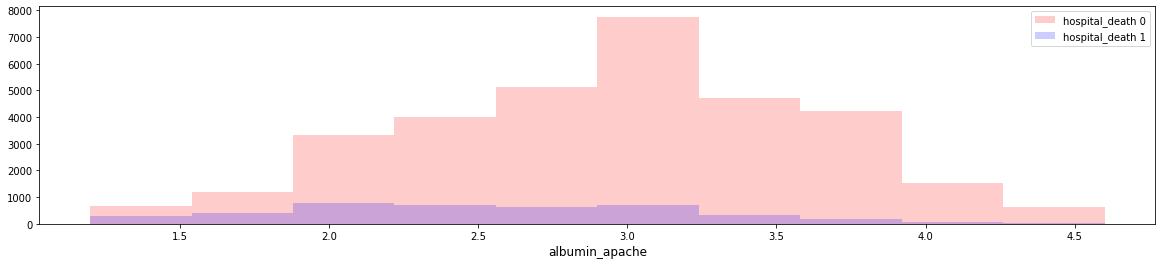

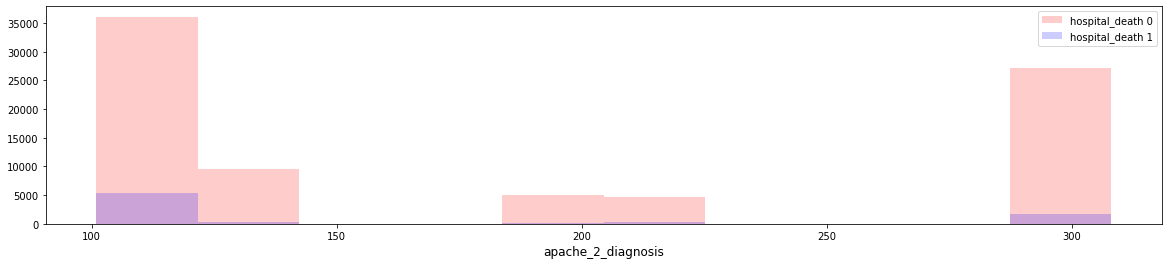

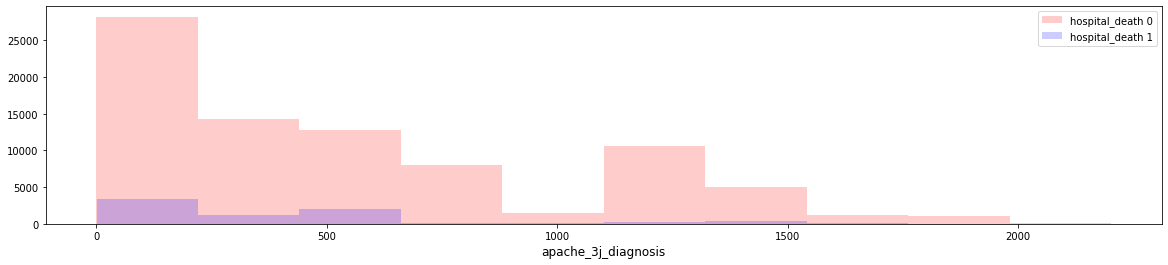

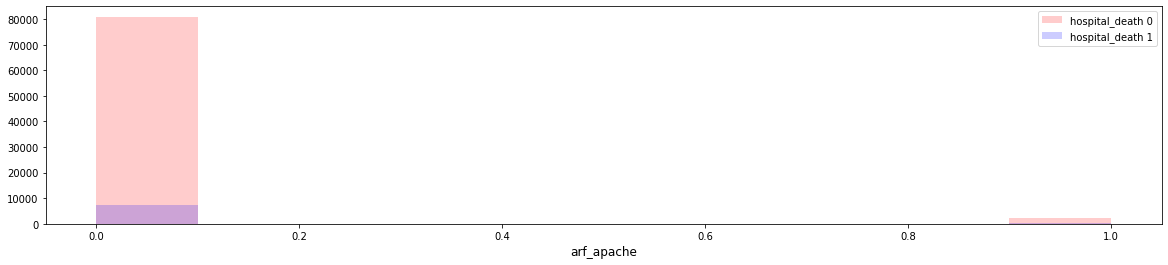

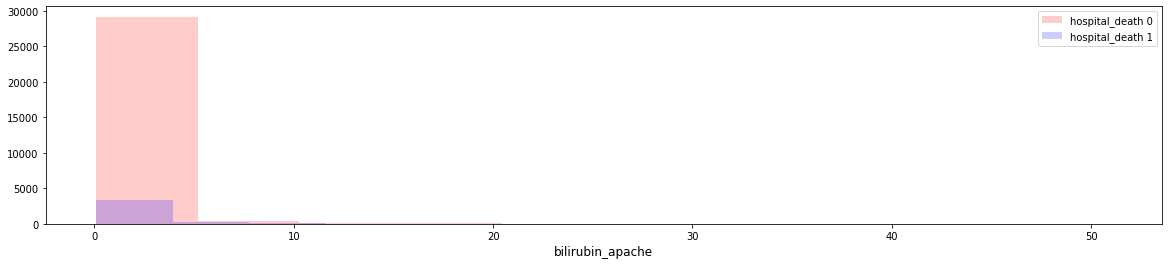

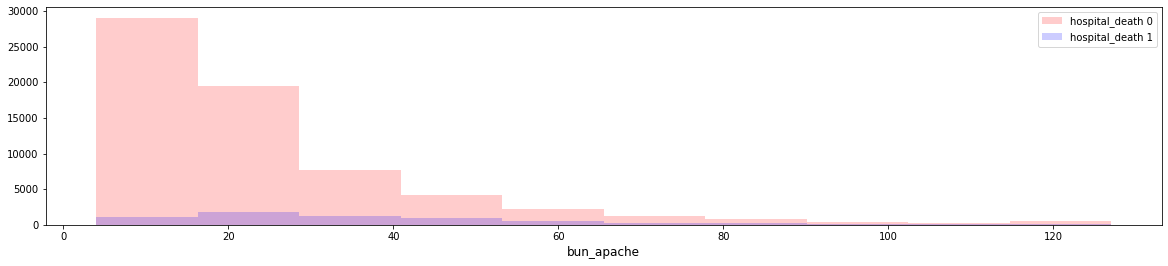

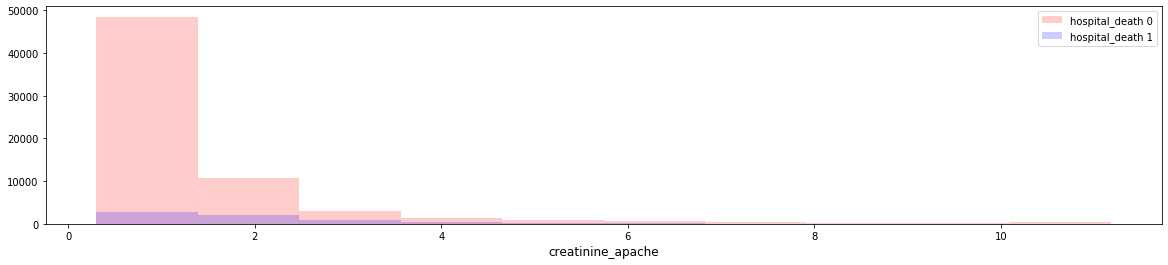

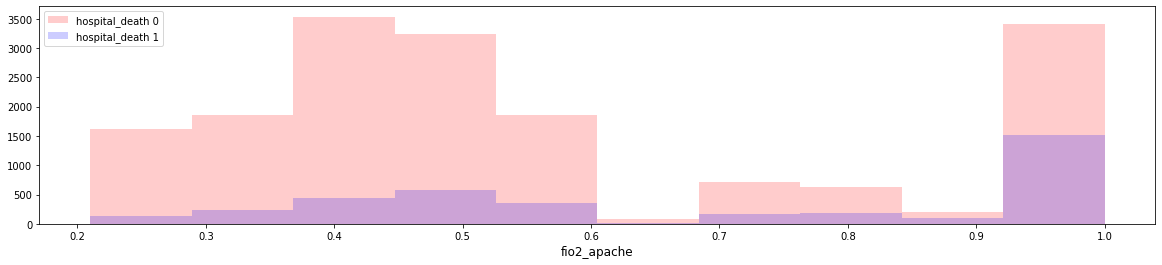

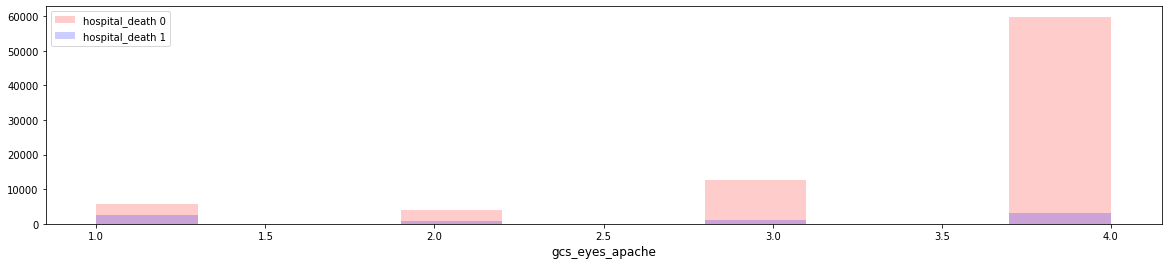

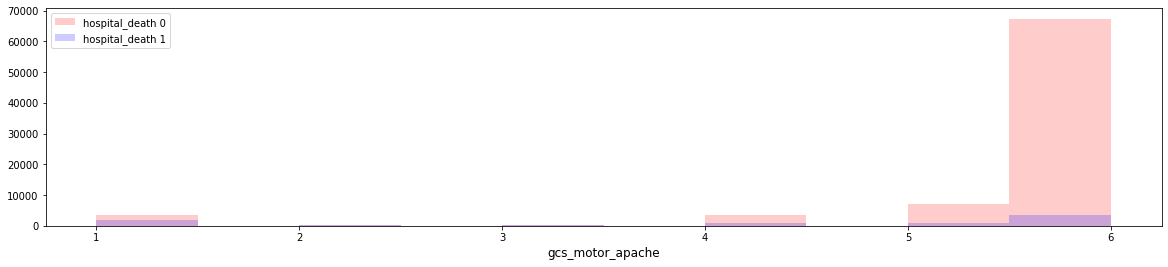

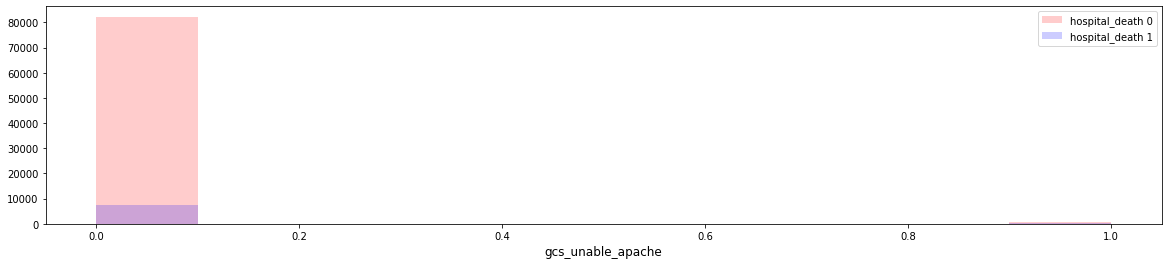

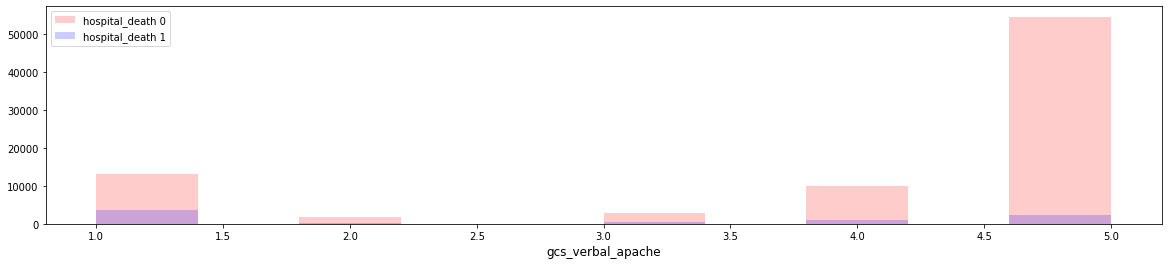

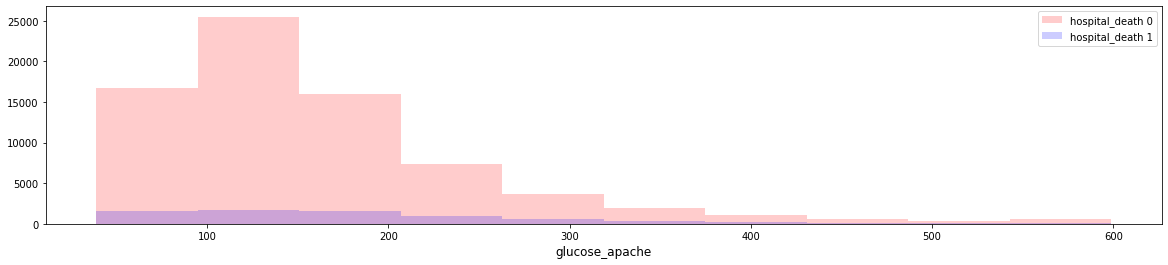

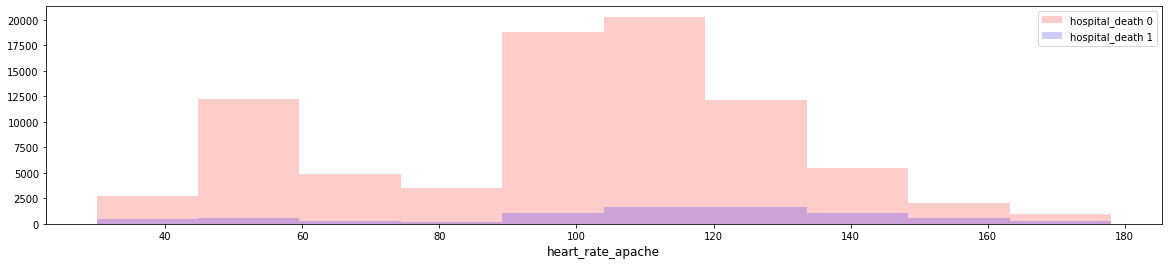

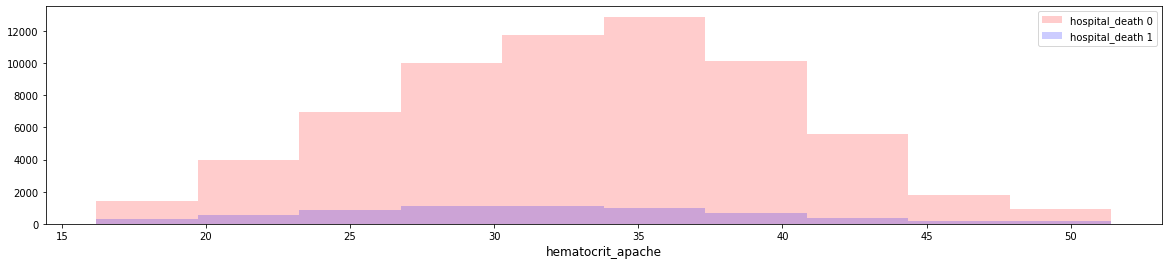

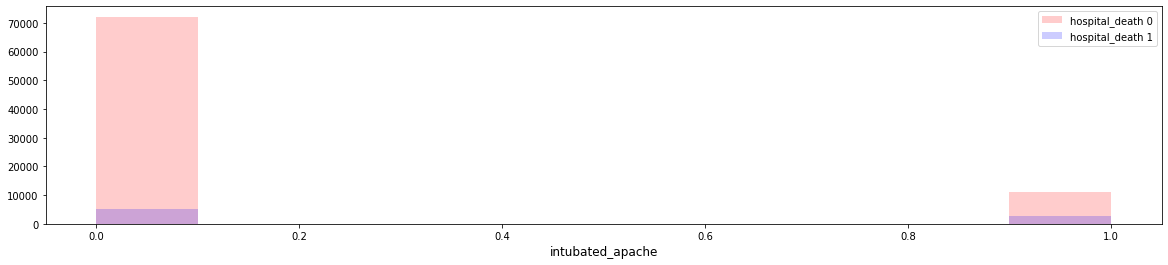

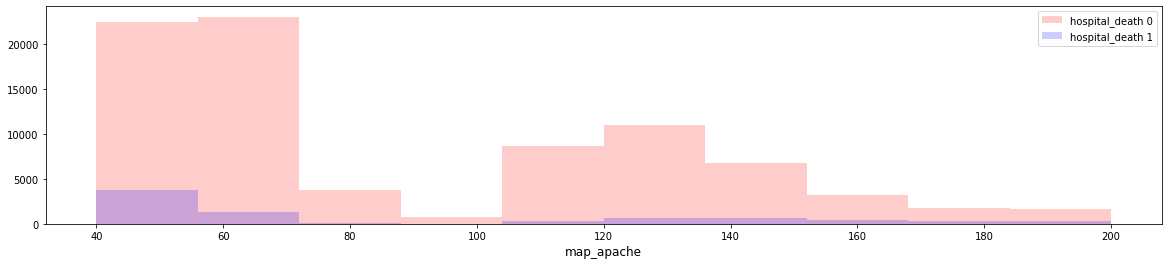

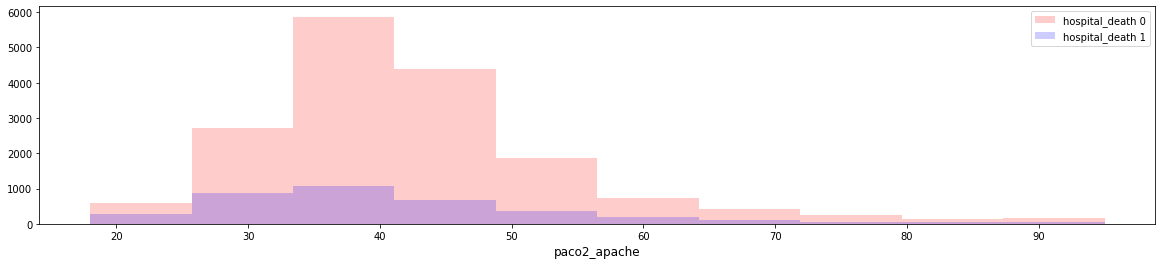

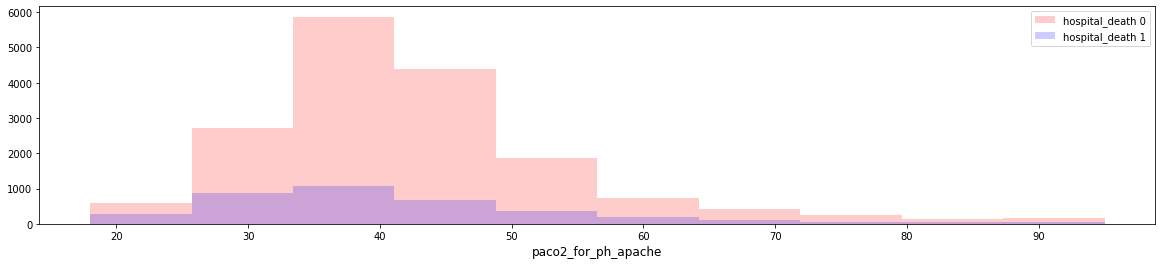

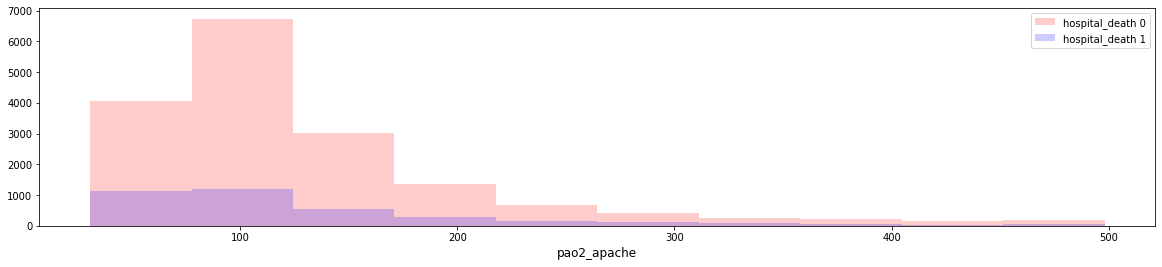

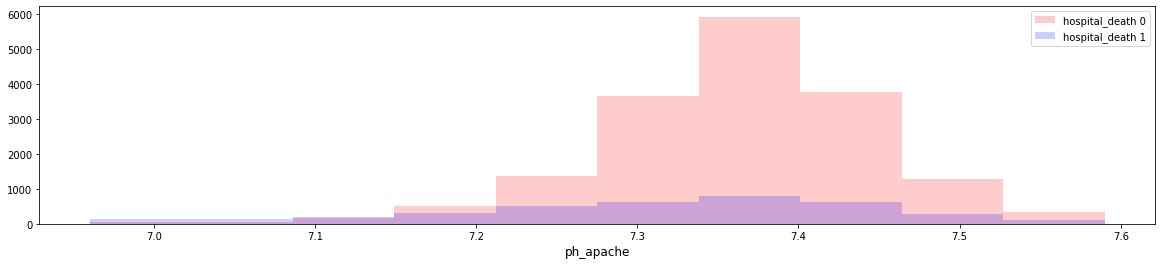

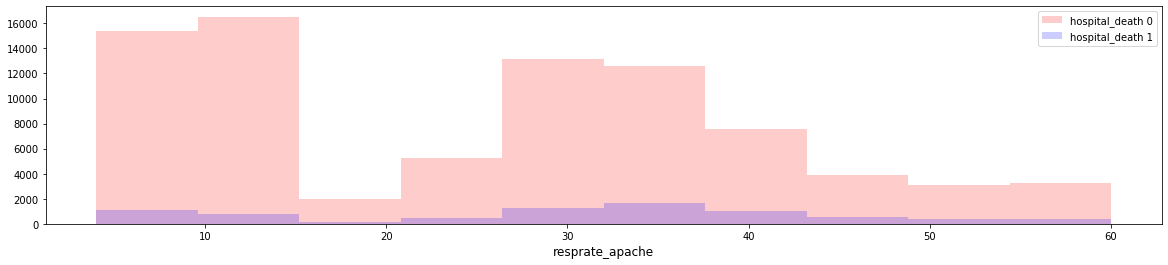

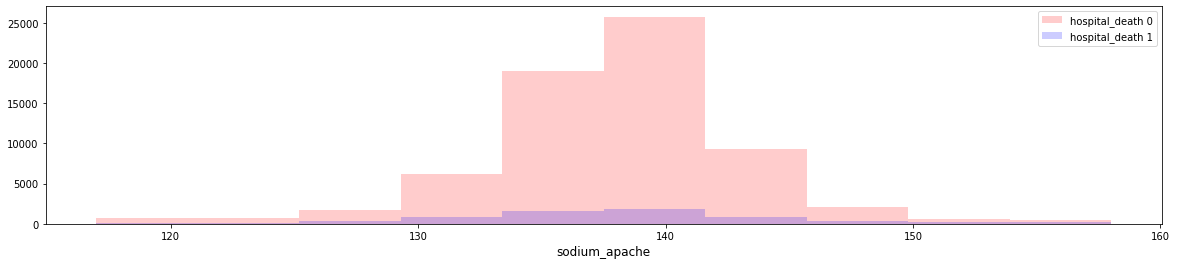

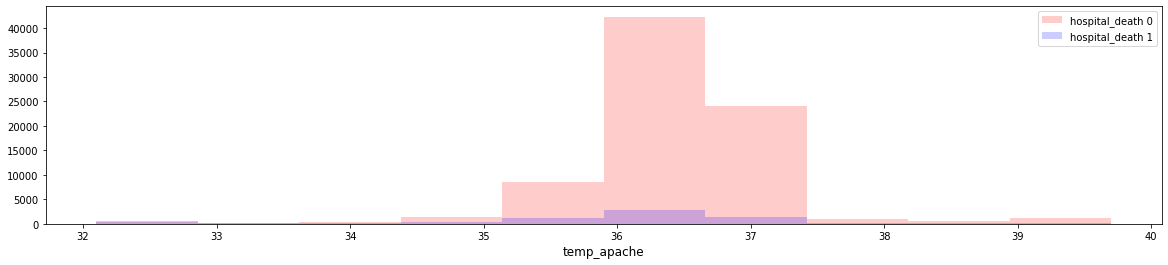

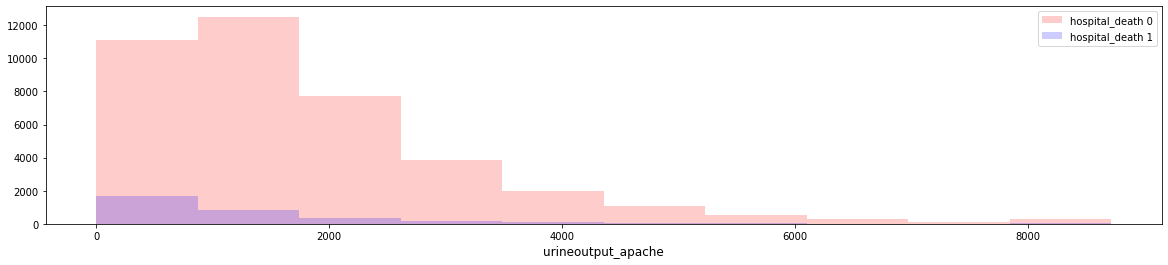

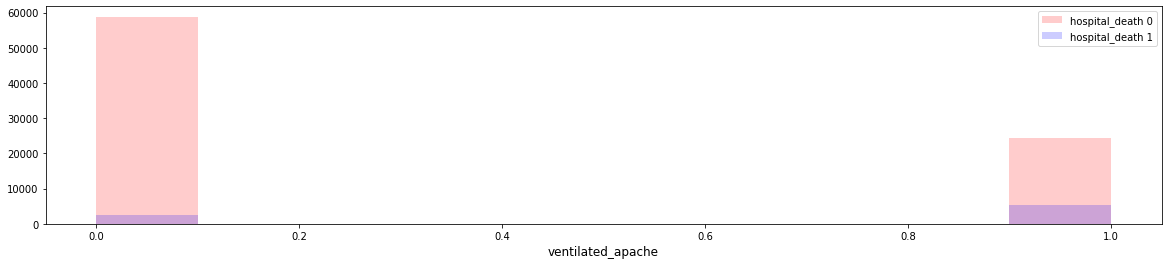

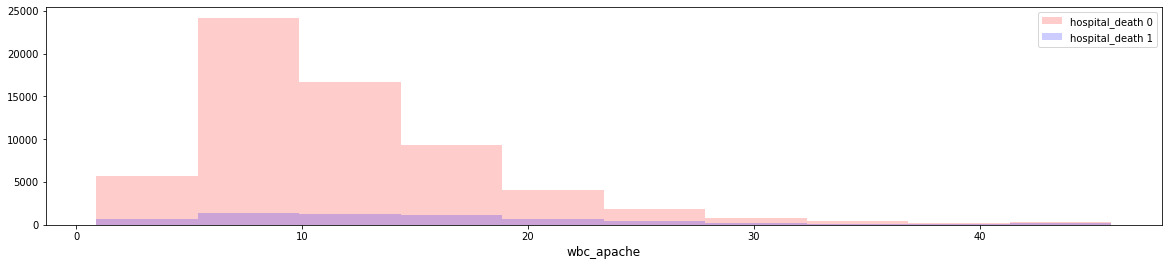

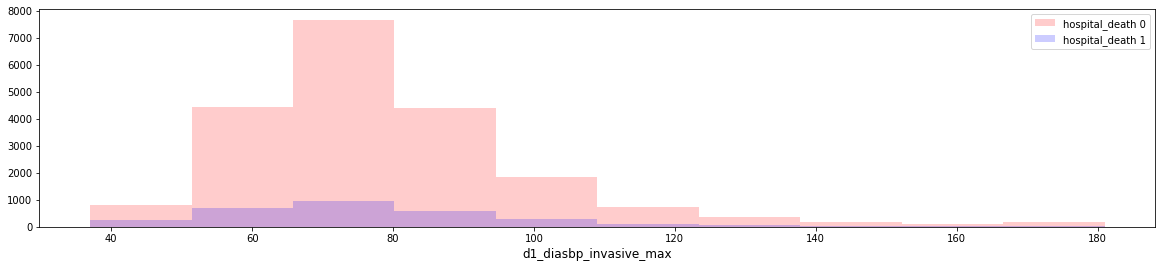

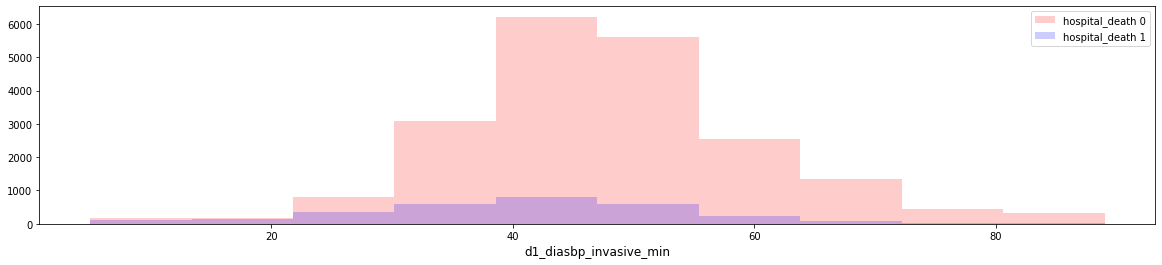

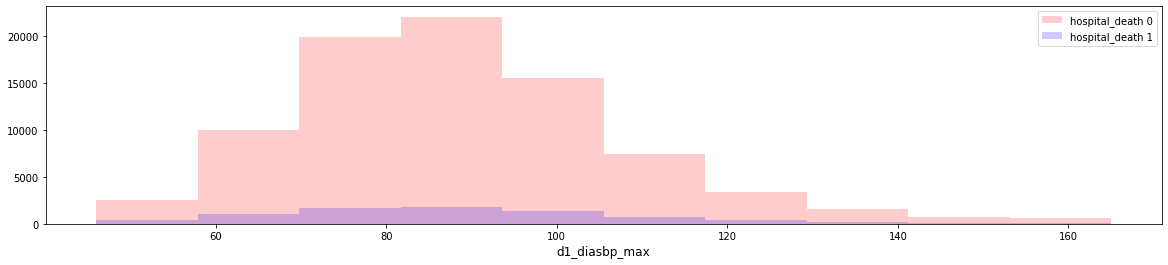

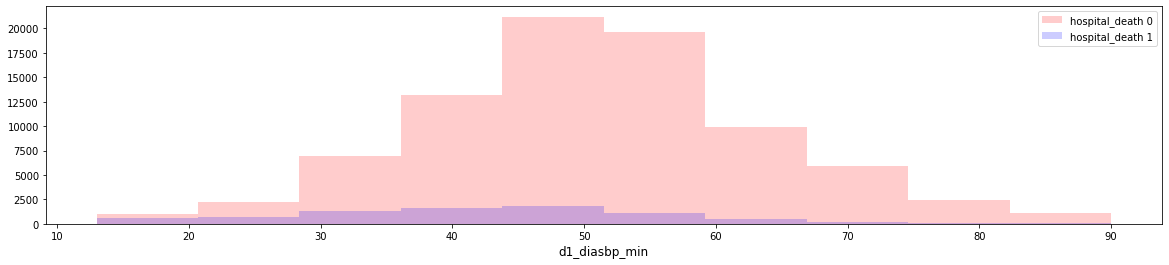

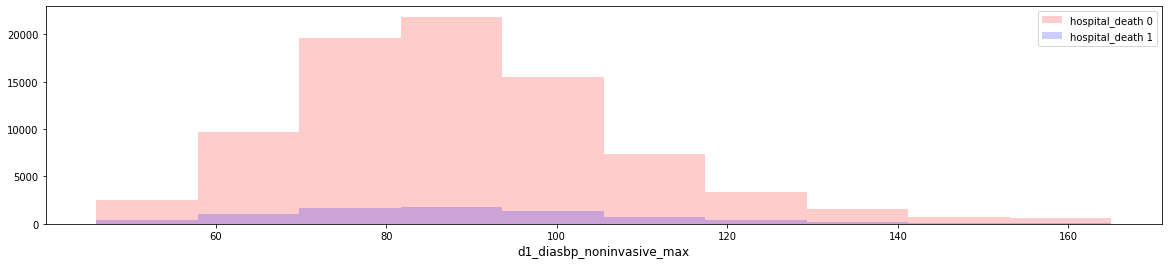

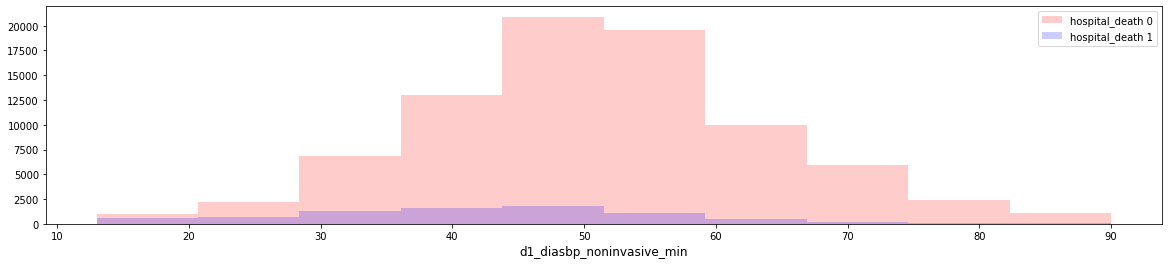

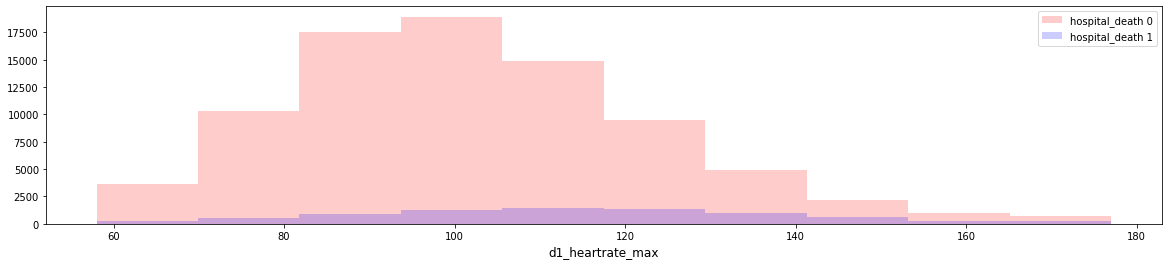

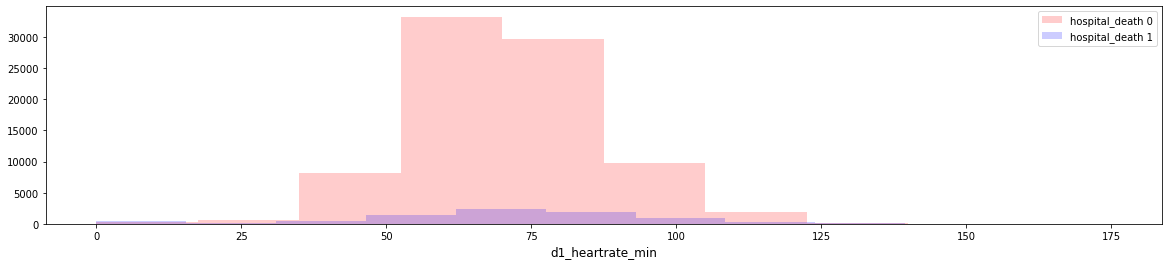

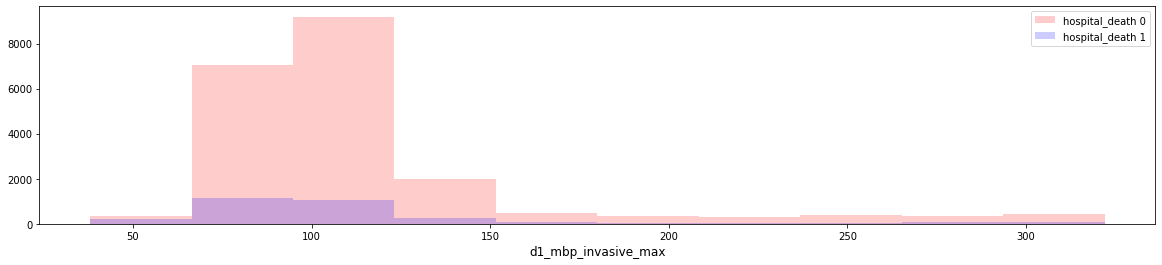

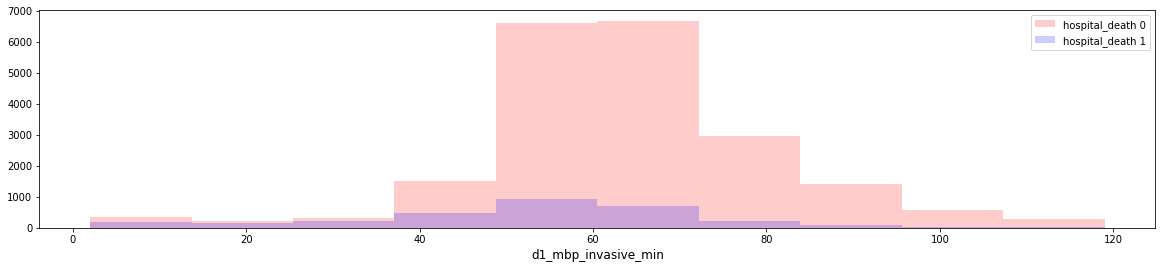

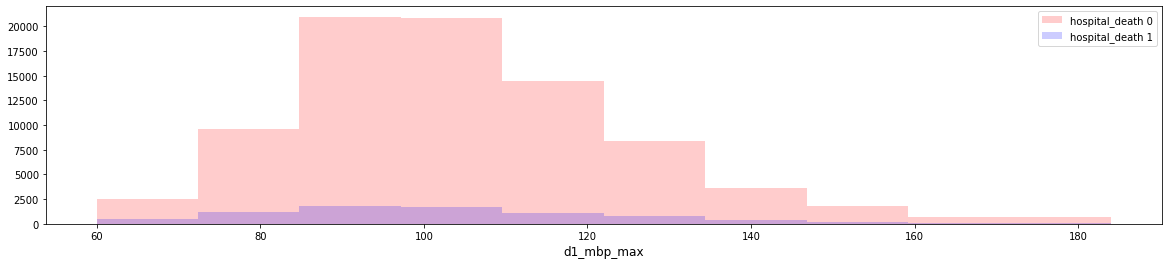

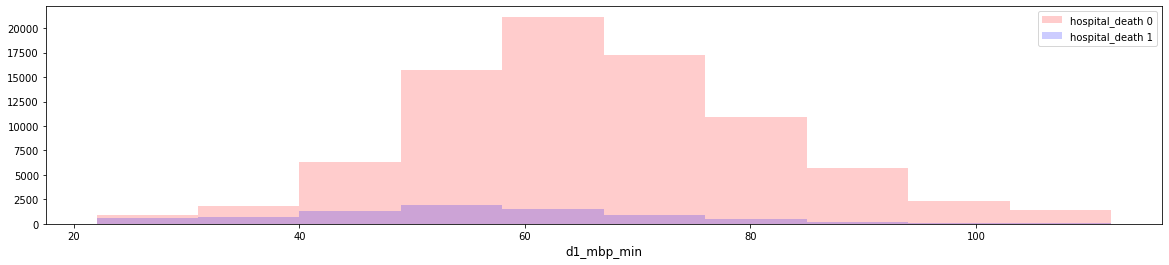

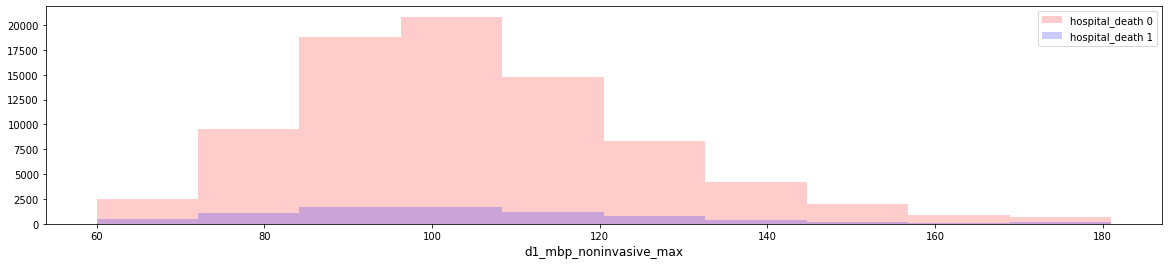

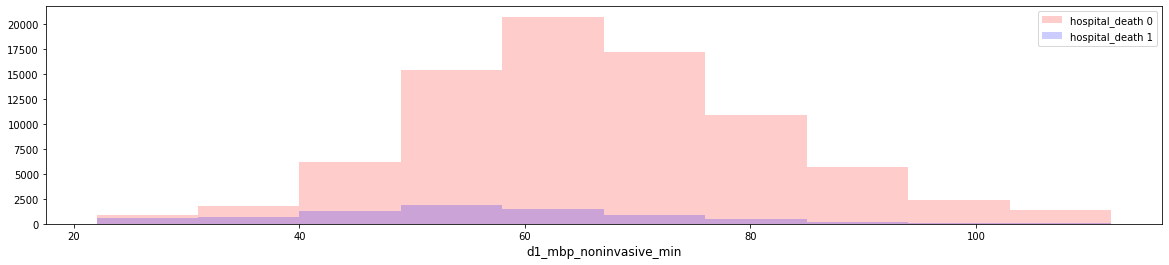

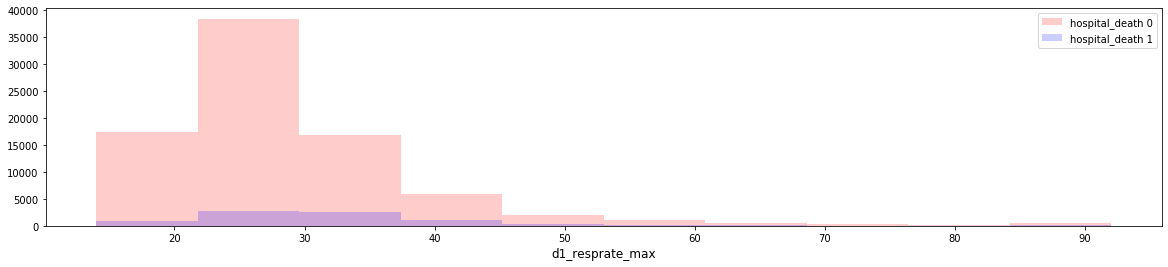

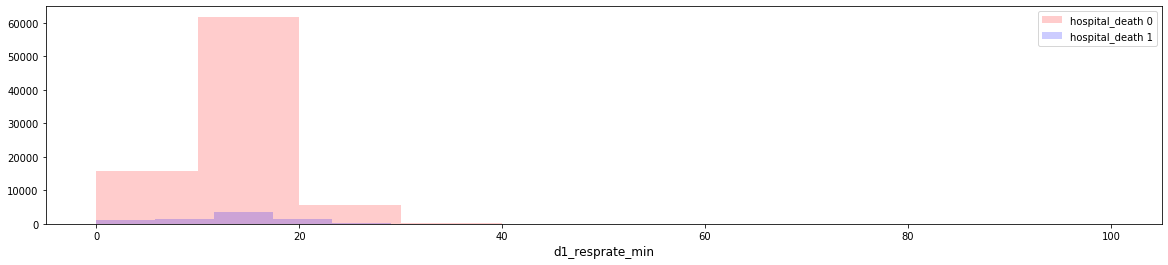

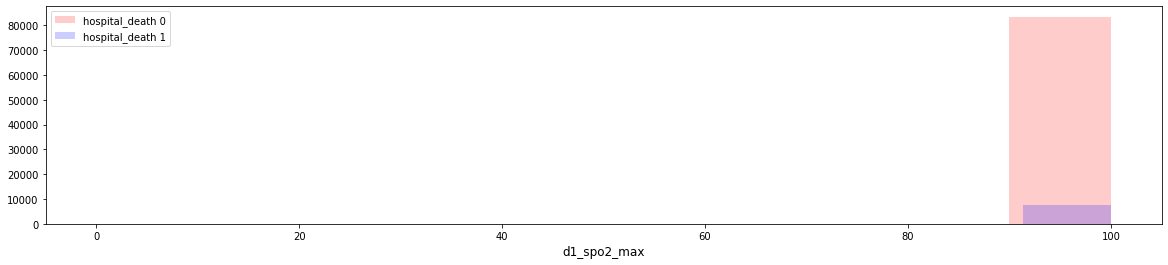

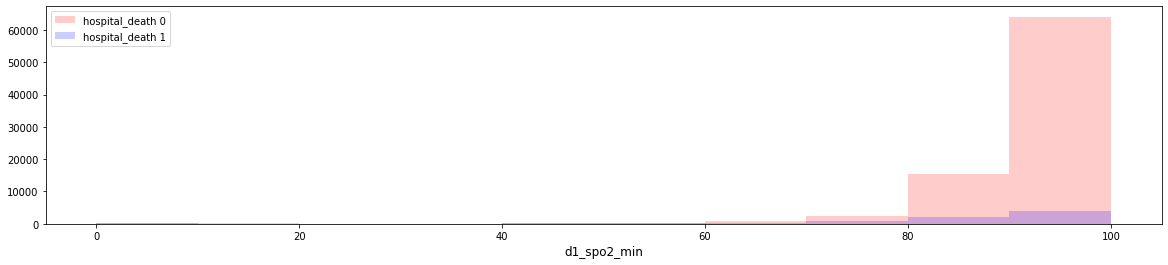

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
i=0
for col in icu_data.columns:  
    if icu_data[col].dtype == 'float' :
        
        if i< 50:

                df1      = icu_data.loc[icu_data['hospital_death']==0]
                df2      = icu_data.loc[icu_data['hospital_death']==1]

                fig = plt.figure(figsize=(20,4))
                plt.hist(df1[col].dropna(),  color='red', label='hospital_death 0',alpha=0.2); 
                plt.hist(df2[col].dropna(),  color='blue', label='hospital_death 1',alpha=0.2); 

                plt.xlabel(col, fontsize=12)
                fig=plt.legend(loc='best')
                plt.show()
                i=i+1

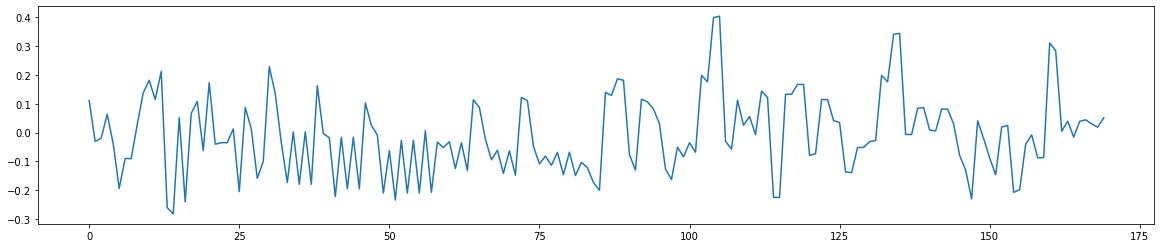

,name,cor
0,age,0.111017
1,bmi,-0.031247
2,height,-0.019526
3,pre_icu_los_days,0.063316
4,weight,-0.038362


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
cor=[]
feature = pd.DataFrame()
feature['name']=icu_data.select_dtypes(include=['float']).columns
for col in icu_data.columns:  
    if icu_data[col].dtype == 'float'  :
        cor.append( icu_data[col].corr(icu_data['hospital_death']))
fig = plt.figure(figsize=(20,4))
plt.plot(cor)
plt.show()
feature['cor']=cor
feature.head()
    
        
     
               

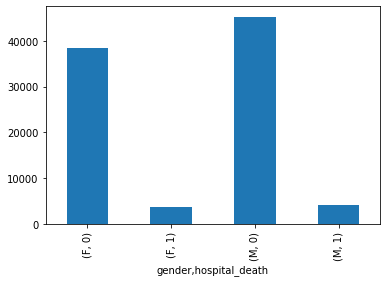

In [15]:
icu_data.groupby(['gender','hospital_death'])['encounter_id'].count().plot(kind='bar')

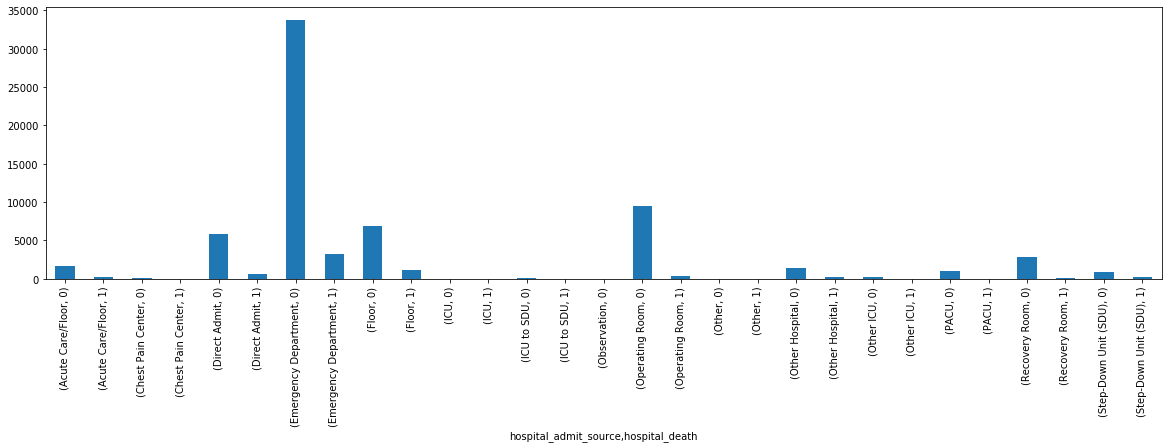

In [16]:
icu_data.groupby(['hospital_admit_source','hospital_death'])['encounter_id'].count().plot(kind='bar',figsize=(20,5))

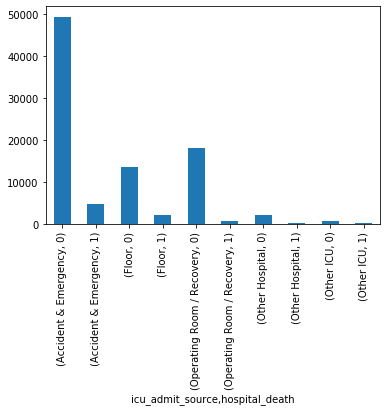

In [17]:
icu_data.groupby(['icu_admit_source','hospital_death'])['encounter_id'].count().plot(kind='bar')

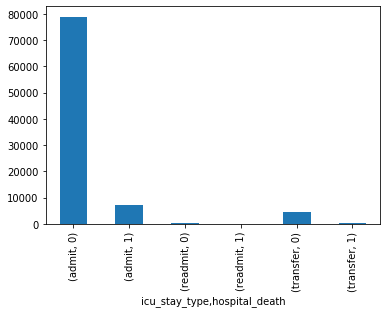

In [18]:
icu_data.groupby(['icu_stay_type','hospital_death'])['encounter_id'].count().plot(kind='bar')

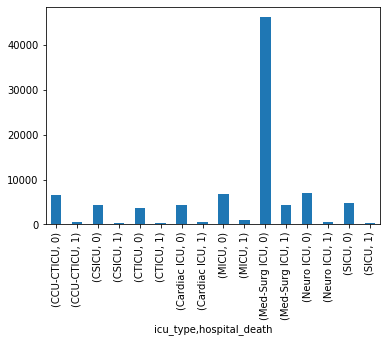

In [19]:
icu_data.groupby(['icu_type','hospital_death'])['encounter_id'].count().plot(kind='bar')

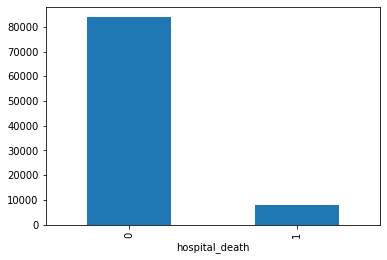

In [20]:
icu_data.groupby(['hospital_death'])['encounter_id'].count().plot(kind='bar')

In [21]:
icu_data['gender'].isna().sum()

25

In [22]:
mode_gender = icu_data['gender'].mode()
icu_data['gender']=icu_data['gender'].fillna(mode_gender)

In [23]:
print(type(mode_gender))

<class 'pandas.core.series.Series'>


In [24]:
mode_gender

0    M
dtype: object

In [25]:
icu_data.iloc[0]['gender']

'M'

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
icu_data['hospital_admit_source'].isna().sum()

21409

In [28]:
icu_data['hospital_admit_source'].value_counts()

Emergency Department    36962
Operating Room           9787
Floor                    8055
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64

In [29]:
icu_data['hospital_admit_source'].isna().sum()

21409

In [30]:
mode_has = icu_data['hospital_admit_source'].mode()
icu_data['hospital_admit_source']=icu_data['hospital_admit_source'].fillna(mode_has)

In [31]:
icu_data['hospital_admit_source'].isna().sum()

21409

'icu_admit_source',
1.        'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'**

In [32]:
mode_has

0    Emergency Department
dtype: object

In [33]:
mode_ias = icu_data['icu_admit_source'].mode()
icu_data['icu_admit_source']=icu_data['icu_admit_source'].fillna(mode_ias)
mode_ist = icu_data['icu_stay_type'].mode()
icu_data['icu_stay_type']=icu_data['icu_stay_type'].fillna(mode_ist)
mode_it = icu_data['icu_type'].mode()
icu_data['icu_type']=icu_data['icu_type'].fillna(mode_it)
mode_a3b = icu_data['apache_3j_bodysystem'].mode()
icu_data['apache_3j_bodysystem']=icu_data['apache_3j_bodysystem'].fillna(mode_a3b)
mode_a2b = icu_data['apache_2_bodysystem'].mode()
icu_data['apache_2_bodysystem']=icu_data['apache_2_bodysystem'].fillna(mode_a2b)

In [34]:
#print(icu_data['gender'])
#icu_data2=le.fit_transform(icu_data['gender'].astype('category').cat())
#icu_data['gender_hashed']=le.fit_transform(icu_data['gender'])
#gender = pd.DataFrame(icu_data['gender'])
#icu_data['gender_cat']=gender.astype("category").cat.codes
icu_data['gender'].isna().sum()

25

In [35]:
icu_data['gender'] = icu_data['gender'].astype('str').astype("category").cat.codes

In [36]:
icu_data['gender'].value_counts()

1    49469
0    42219
2       25
Name: gender, dtype: int64

In [37]:
icu_data['icu_admit_source'].value_counts()

Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64

In [38]:
icu_data['icu_admit_source'] = icu_data['icu_admit_source'].astype('str').astype("category").cat.codes

In [39]:
icu_data['icu_admit_source'].value_counts()

0    54060
2    18713
1    15611
3     2358
4      859
5      112
Name: icu_admit_source, dtype: int64

In [40]:
#'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'
icu_data['icu_stay_type'] = icu_data['icu_stay_type'].astype('str').astype("category").cat.codes
icu_data['icu_type'] = icu_data['icu_type'].astype('str').astype("category").cat.codes
icu_data['apache_3j_bodysystem'] = icu_data['apache_3j_bodysystem'].astype('str').astype("category").cat.codes
icu_data['apache_2_bodysystem'] = icu_data['apache_2_bodysystem'].astype('str').astype("category").cat.codes

In [41]:
icu_data['hospital_admit_source'] = icu_data['hospital_admit_source'].astype('str').astype("category").cat.codes

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = icu_data['hospital_death']
X = icu_data.drop(FeatureToBeRemoved,axis=1)

In [44]:
X.shape

(91713, 178)

In [45]:
y.shape

(91713,)

In [46]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train.shape

(73370, 178)

In [48]:
y_train.shape

(73370,)

In [49]:
X_train.describe()

,age,bmi,elective_surgery,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,69990.000000,70612.000000,73370.000000,73370.000000,73370.000000,73370.000000,73370.000000,73370.000000,73370.000000,73370.0,...,72790.000000,72790.000000,72790.000000,72790.000000,72790.000000,72790.000000,72790.000000,72790.000000,73370.000000,73370.000000
mean,62.291399,29.200055,0.183508,0.539771,6.992258,0.700750,0.114761,4.285157,0.842448,0.0,...,0.000866,0.015607,0.224756,0.012749,0.026350,0.006938,0.004053,0.020580,4.371869,2.648780
std,16.785453,8.282961,0.387085,0.498966,5.227274,0.955209,0.458618,1.805777,2.522416,0.0,...,0.029407,0.123948,0.417425,0.112190,0.160174,0.083004,0.063533,0.141974,3.874315,2.932006
min,16.000000,14.844926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.775000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,23.637658,0.000000,0.000000,3.000000,0.000000,0.000000,4.000000,0.035417,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.658402,0.000000,1.000000,4.000000,0.000000,0.000000,5.000000,0.138889,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
75%,75.000000,32.950680,0.000000,1.000000,13.000000,1.000000,0.000000,5.000000,0.409722,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000
max,89.000000,67.814990,1.000000,2.000000,15.000000,5.000000,2.000000,7.000000,159.090972,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [50]:
X_train.isna().sum()

age                            3380
bmi                            2758
elective_surgery                  0
gender                            0
hospital_admit_source             0
                               ... 
leukemia                        580
lymphoma                        580
solid_tumor_with_metastasis     580
apache_3j_bodysystem              0
apache_2_bodysystem               0
Length: 178, dtype: int64

In [51]:
X_train=X_train.fillna(X_train.mean())

In [52]:
X_test=X_test.fillna(X_test.mean())

In [53]:
X_train.isna().sum()

age                            0
bmi                            0
elective_surgery               0
gender                         0
hospital_admit_source          0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 178, dtype: int64

In [54]:
X_train.isna().sum().sum()

0

In [55]:
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression()
logisticRegressionModel.fit(X_train,y_train)
y_pred = logisticRegressionModel.predict(X_test)
print(logisticRegressionModel.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


C:\Users\ven_n_000.000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9247124243580658


array([[16507,   237],
       [ 1144,   455]], dtype=int64)

In [56]:
from sklearn import tree
decisionTreeModel = tree.DecisionTreeClassifier()

decisionTreeModel.fit(X_train,y_train)
y_pred = decisionTreeModel.predict(X_test)
print(decisionTreeModel.score(X_test, y_test))

confusion_matrix(y_test, y_pred)


0.8843700594232132


array([[15621,  1123],
       [  998,   601]], dtype=int64)

In [57]:
from sklearn.naive_bayes import GaussianNB
gnbModel = GaussianNB()
gnbModel.fit(X_train,y_train)
y_pred = gnbModel.predict(X_test)
print(gnbModel.score(X_test, y_test))

confusion_matrix(y_test, y_pred)


0.8350869541514474


array([[14409,  2335],
       [  690,   909]], dtype=int64)

In [58]:
from sklearn.neural_network import MLPClassifier

MLPclfModel = MLPClassifier(solver='adam', alpha=1e-5,
                   learning_rate='adaptive', random_state=1)

MLPclfModel.fit(X_train, y_train)
y_pred = MLPclfModel.predict(X_test)
print(MLPclfModel.score(X_test, y_test))

confusion_matrix(y_test, y_pred)



0.9227498228206945


array([[16694,    50],
       [ 1367,   232]], dtype=int64)

In [59]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(criterion='entropy')
RFclf.fit(X_train, y_train)

y_pred = RFclf.predict(X_test)
print(RFclf.score(X_test, y_test))

confusion_matrix(y_test, y_pred)

print(RFclf.feature_importances_)


C:\Users\ven_n_000.000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9249850079049229
[1.07613827e-02 9.09356438e-03 2.11495086e-03 1.27302335e-03
 3.07503722e-03 2.91492656e-03 4.16385791e-04 2.86753987e-03
 8.91611965e-03 0.00000000e+00 3.68707487e-03 1.03174643e-02
 1.94559808e-02 1.22267871e-03 4.34743254e-04 3.92943740e-03
 8.56945976e-03 8.55189871e-03 5.13826577e-03 7.67537316e-03
 1.29113953e-02 4.85085315e-04 1.60978057e-02 7.75320253e-03
 8.47686957e-03 6.51579707e-03 4.80560093e-04 7.10845946e-03
 3.16231929e-03 5.07383817e-03 4.83886861e-03 3.99104054e-03
 6.16177789e-03 6.18919422e-03 1.21233156e-02 4.60114636e-03
 1.37679858e-02 6.56530761e-03 1.94863824e-03 4.15149690e-03
 6.28241302e-03 6.17304206e-03 5.98298214e-03 6.64393888e-03
 1.16463950e-02 1.16062184e-02 2.98220682e-03 3.22177390e-03
 5.98593124e-03 1.29932254e-02 5.73278422e-03 1.06376325e-02
 7.25885561e-03 7.04957880e-03 2.43716880e-03 1.31184644e-02
 2.80024619e-03 3.52472067e-03 6.17206844e-03 1.68428188e-02
 6.62673642e-03 1.07156624e-02 1.04384894e-02 9.05510733e-03
 1.17